<a href="https://colab.research.google.com/github/StephenTGibson/COMP527-colabNotebooks/blob/main/K_nearest_neighbour_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-nearest neighbour classifier

In [41]:
import numpy as np

When developing algorithms it is often desirable to have datasets for testing purposes. When there is no access to a suitable dataset, sometimes it is convenient to generate synthetic data. In this tutorial, we will  
1. create synthetic datasets consisting of two classes of objects;
2. develop the k-NN algorithm;
3. evaluate the algorithm's ability to separate the two classes of objects.

## Excercise 1. Create synthetic dataset

We would like to generate training and validation datasets for binary classification. For visualisation purposes, we will assume that our objects have 2 numeric features. We would like to generate 2 "cloulds" of points on the plane corresponding to the positive and negative objects respectively. To do this, one can generate random points from a [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) (function $\texttt{np.random.multivariate_normal}$). For example, $\texttt{np.random.multivariate_normal([a,b], [[1,0],[0,1]], N)}$ will generate a set on N points scattered around the *mean* point $(a,b)$.

1. Create two sets of $N=10$ points. The first set scattered around the point $(0,0)$ and the second scattered around the point $(2,2)$. These sets of points will correspond to the positive and the negative class respectively.

In [31]:
N = 10
points1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], N)
points2 = np.random.multivariate_normal([2,2], [[1,0],[0,1]], N)

2. Plot the generated sets of points. Use different colours or markers for different classes.

In [6]:
import matplotlib.pyplot as plt

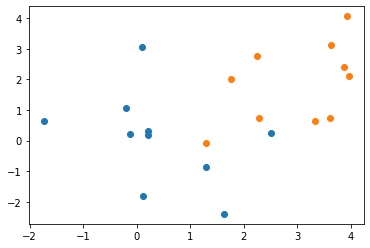

In [9]:
plt.scatter(points1[:,0],
            points1[:,1]
            )

plt.scatter(points2[:,0],
            points2[:,1]
            )

In [49]:
points1 = np.append(points1, np.full((N, 1), 1), 1)
points1

array([[-0.95181668, -0.65632787,  1.        ],
       [ 0.24730115, -0.74277151,  1.        ],
       [ 0.30293289, -1.82321053,  1.        ],
       [-0.50358774,  0.95108979,  1.        ],
       [ 1.02178009, -0.469059  ,  1.        ],
       [ 1.10085209,  0.89238455,  1.        ],
       [-0.76450197,  0.44680563,  1.        ],
       [-0.08010312,  0.62511205,  1.        ],
       [-0.41082959,  1.19391636,  1.        ],
       [-0.59623682, -0.29302622,  1.        ]])

In [50]:
points2 = np.append(points2, np.full((N, 1), -1), 1)
points2

array([[ 1.79288224,  2.02501791, -1.        ],
       [ 1.81326983,  2.19956254, -1.        ],
       [-0.16635322,  2.66066524, -1.        ],
       [ 1.40377078,  3.0436145 , -1.        ],
       [ 1.83696265,  2.94949321, -1.        ],
       [ 1.54690658,  3.07241404, -1.        ],
       [ 3.14154871, -0.59505467, -1.        ],
       [ 1.78656219,  2.61226737, -1.        ],
       [ 1.93053272,  0.65044725, -1.        ],
       [ 1.07872267,  0.02474489, -1.        ]])

3. Split each of the sets into equal train and validation portions. As a result you should have four sets: 
- positive object in the train dataset;
- positive object in the validation dataset;
- negataive object in the train dataset;
- negataive object in the validation dataset;

To confirm that the sets have equal numbers of objects, print the number of elements in each set.

In [51]:
trainSplit = 0.8

points1Train = points1[:int(trainSplit*points1.shape[0]),:]
points1Valid = points1[int(trainSplit*points1.shape[0]):,:]
points2Train = points1[:int(trainSplit*points2.shape[0]),:]
points2Valid = points1[int(trainSplit*points2.shape[0]):,:]

print(points1Train.shape)
print(points1Valid.shape)
print(points2Train.shape)
print(points2Valid.shape)

(8, 3)
(2, 3)
(8, 3)
(2, 3)


4. Add an extra freature (representing the class label: +1 for the positive class, -1 for the negative class) to the train and validation instances. As a result you will have two datasets, each consisting of tuples (label, instance).

In [ ]:
#done

## Excercise 2. Develop the k-NN algorithm

Implement k-NN prediction function that uses the training dataset from the previous exercise. Use cosine similarity as a "measure of distance". The larger the similarity between two objects, the closer the objects are to each other.

1. Create the cosine similarity function that will be used in the k-NN prediction function to find the neighbours. The function should take two vectors as input and output the cosine similarity between the vectors.

2. Implement a function that predicts the class of a validation instance using the k-NN algorithm. The function should take a validation instance and the parameter $k$ as input, and output predicted class of the validation instance (+1 or -1).

## Excercise 3. Evaluate the algorithm

1. Implement $\texttt{kNNaccuracy}$ function that takes the parameter $k$ and the validation dataset as input and output the accuracy of the k-NN algorithm on the validation dataset. Use the function to compute the accuracy of prediciton of the k-NN classifier on the validation dataset, when $k = 5$.

2. Generate new datasets with $N=100$. Compute accuracies of k-NN for all odd $k$ from 1 to 99. Plot k-NN accuracy versus $k$. What is the best value of $k$ for the validation dataset?

3. Conduct further experiments:
    * change the value of $k$
    * increase the number of instances $N$ (make sure that $N$ is even)
    * separate or bring together the two classes by adjusting the means of the two Gaussians.

How does the accuracy vary in each case?